In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.optimize import curve_fit
from scipy import odr
import glob
import os

In [9]:
X1 = np.array([0.024,0.0245,0.0245,0.026,0.026,0.0285,0.0285,0.029,0.03,0.031,0.0315,0.0325,0.034,0.036,0.0365,0.038])
X2 = np.array([0.0185,0.0195,0.02,0.0205,0.021,0.022,0.023,0.0245,0.025,0.026,0.0265,0.0275,0.0285,0.0285,0.0295,0.031,0.031,0.0315,0.033,0.035,0.036,0.037,0.038,0.0425,0.0455,0.0505])
X3 = np.array([0.0205,0.022,0.023,0.024,0.024,0.025,0.026,0.0265,0.027,0.0285,0.0295,0.0305,0.031,0.0315,0.032,0.033,0.034,0.0355,0.037,0.038,0.039,0.043,0.0465])
X4 = np.array([0.0195,0.0205,0.021,0.0215,0.0225,0.023,0.024,0.025,0.025,0.0265,0.0275,0.0275,0.029,0.0295,0.0305,0.0305,0.0315,0.0335,0.0345,0.0355,0.037,0.041,0.0435,0.0495])
X5 = np.array([0.0185,0.02,0.0205,0.021,0.022,0.023,0.0235,0.025,0.0255,0.026,0.027,0.028,0.0295,0.0305,0.0305,0.031,0.0325,0.034,0.0345,0.035,0.0355,0.037,0.0385,0.04,0.041])

In [10]:
hz2_5 = np.array([200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 320, 340, 360, 380, 400])
hz5 = np.array([130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 320, 340, 360, 380, 400, 450, 500, 600])
hz10 = np.array([150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 320, 340, 360, 380, 400, 450, 500])
hz20 = np.array([150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 320, 340, 360, 380, 400, 450, 500, 600])
hz30 = np.array([120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290,300, 310 ,320,340,360,380,400])

Surface Tension of Salt water of 17.33 g/L 82.20519740260437 +- 38.896274837029424 mN/M
Surface Tension of Salt water of 50.6 g/L 61.36626804676657 +- 12.398479344835774 mN/M
Surface Tension of Salt water of 104.66 g/L 32.726352123202496 +- 7.751953030125702 mN/M
Surface Tension of Salt water of 136 g/L 77.67545947178166 +- 16.842869897090573 mN/M
Surface Tension of Salt water of 202.6 g/L 49.31615750838266 +- 12.909637496775527 mN/M


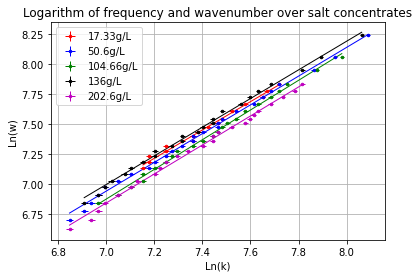

In [11]:
#The amount of salt used in each solution in terms of g/L
sols = [17.33, 50.6, 104.66, 136, 202.6]
#The densities of each respective solution in g/L
dens = [1019.85, 1056.18, 1110.38, 1139.47, 1196.32]
#colours for the graph
cols = ['r','b','g','k','m']
X = [X1, X2, X3, X4, X5]
hzs = [hz2_5, hz5, hz10, hz20, hz30]
#plt.figure(figsize = (20,11))
plt.grid()

for hzs, X, sols,c,p in zip(hzs, X, sols, cols,dens):
    #Laser wavelength, distance of the 0th order image above water, and the distance between the screen and laser
    laz = 632.8e-9
    x = 0.0492
    y = 0.4838
    theta = np.arcsin( x / np.sqrt( (x**2)+(y**2))  )
    l = 4.838
    x1 = 1*np.tan(theta)
    k = []
    for i in X:
        h = x1 + i 
        j = 2*i
        m = ( np.pi*h*j ) / ( laz*((h**2)+l**2) )
        k.append(m)
    #logs of the values for the lnk lnw relation
    lnk = np.log(k)
    w = 2 * hzs * np.pi
    lnw = np.log(w)
    
    #all code below follows a propogation of errors following pm the smallest decimal of each data point i.e 0.0005
    xerr = yerr = 0.0005
    dfdx =  y / ( (x**2) + (y**2) )
    dfdy = -( x / ( (x**2) + (y**2) ))
    theterr = np.sqrt( (dfdy**2) * (yerr**2) + (dfdx**2) * (xerr**2) )
    
    Xx1 = l*np.tan(theta)
    lerr = 0.0005
    dfdl = np.tan(theta)
    dfdt = 1 / (np.cos(theta)**2)
    Xerr = np.sqrt ( (dfdl**2) * (lerr**2) + (dfdt**2) * (theterr**2) )
    
    lnkerr = []
    dfdl = - ( (2*l) / ( (h**2) + (l**2)) )
    dfdh = - ( (h**2) - (l**2) ) / ( (h**3) + h*(l**2) )
    
    for i in X:
        d = 2*i
        derr = 0.0005
        h = Xx1 + d/2
        dhdx = 1
        dhdd = 1/2
        herr = np.sqrt( (dhdx**2) * (Xerr**2) + (dhdd**2) * (derr**2) )
        dfdd = 1/d
        
        lnkerrv = np.sqrt( (dfdh**2) * (herr**2) + (dfdd**2) * (derr**2) + (dfdl**2) * (lerr**2) )
        lnkerr.append(lnkerrv)
        
    lnwerr = []
    for i in hzs:
        lnwerrv = np.sqrt( ( (1/i)**2) * ( (0.5)**2) )
        lnwerr.append(lnwerrv)
    
    #Errors of lnk and lnw   
    plt.errorbar(lnk, lnw, lnwerr, lnkerr, '.', markersize = 5, linewidth = 1, color = c, label = str(sols)+"g/L")
    plt.legend()
    
    def func(p, x):
        m, c = p
        return m*x + c 
    
    data = odr.RealData( lnk, lnw, sx = lnkerr, sy = lnwerr)
    lin = odr.Model(func)
    odr1 = odr.ODR(data, lin, beta0 = [1.5, -5])
    out = odr1.run()
    
    errsurf = np.sqrt(((2*p*np.exp( 2*( out.beta[1]) ) )**2) * ( (out.sd_beta[1])**2) )
    
    y = out.beta[0] * lnk + out.beta[1]
    plt.plot(lnk,y,linewidth=1,color=c)
    plt.title('Logarithm of frequency and wavenumber over salt concentrates')
    plt.xlabel('Ln(k)')
    plt.ylabel('Ln(w)')
    
    
    
    surf = p * np.exp(2*out.beta[1])
    print('Surface Tension of Salt water of', str(sols), 'g/L',surf,'+-',errsurf, 'mN/M')
    
plt.savefig('Surface tension saline')

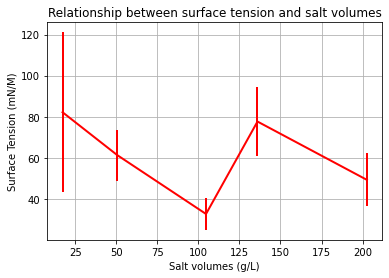

In [12]:
surface = [82.20519740260437,61.36626804676657,32.726352123202496,77.67545947178166,49.31615750838266]
surfacerr = [38.896274837029424, 12.398479344835774, 7.751953030125702, 16.842869897090573 ,12.909637496775527]
sols = [17.33, 50.6, 104.66, 136, 202.6]

#plt.figure(figsize = (20,11))
plt.grid()
plt.errorbar(sols, surface, surfacerr, markersize = 5, linewidth = 2, color= 'r')
plt.title('Relationship between surface tension and salt volumes')
plt.xlabel('Salt volumes (g/L)')
plt.ylabel('Surface Tension (mN/M)')
plt.savefig('surfaceSalt')